# Data quality analysis
Look for missing data and anomalies in the raw data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

### Aggregated demand data

In [2]:
# check which state+year+month is missing

import os
states=['NSW', 'QLD', 'VIC', 'SA', 'TAS']

for state in states:
    for year in range(1999, 2024):
        for month in range(1, 13):
            file='PRICE_AND_DEMAND_'+str(year)+str(month).zfill(2)+'_'+state+'1.csv'
            
            if os.path.isfile('aggregated_demand/'+file):
                pass
            else:
                print(state, year, month)
            
          

TAS 1999 1
TAS 1999 2
TAS 1999 3
TAS 1999 4
TAS 1999 5
TAS 1999 6
TAS 1999 7
TAS 1999 8
TAS 1999 9
TAS 1999 10
TAS 1999 11
TAS 1999 12
TAS 2000 1
TAS 2000 2
TAS 2000 3
TAS 2000 4
TAS 2000 5
TAS 2000 6
TAS 2000 7
TAS 2000 8
TAS 2000 9
TAS 2000 10
TAS 2000 11
TAS 2000 12
TAS 2001 1
TAS 2001 2
TAS 2001 3
TAS 2001 4
TAS 2001 5
TAS 2001 6
TAS 2001 7
TAS 2001 8
TAS 2001 9
TAS 2001 10
TAS 2001 11
TAS 2001 12
TAS 2002 1
TAS 2002 2
TAS 2002 3
TAS 2002 4
TAS 2002 5
TAS 2002 6
TAS 2002 7
TAS 2002 8
TAS 2002 9
TAS 2002 10
TAS 2002 11
TAS 2002 12
TAS 2003 1
TAS 2003 2
TAS 2003 3
TAS 2003 4
TAS 2003 5
TAS 2003 6
TAS 2003 7
TAS 2003 8
TAS 2003 9
TAS 2003 10
TAS 2003 11
TAS 2003 12
TAS 2004 1
TAS 2004 2
TAS 2004 3
TAS 2004 4
TAS 2004 5
TAS 2004 6
TAS 2004 7
TAS 2004 8
TAS 2004 9
TAS 2004 10
TAS 2004 11
TAS 2004 12
TAS 2005 1
TAS 2005 2
TAS 2005 3
TAS 2005 4


In [3]:
# collect all into a single dataframe

df_agg_demand=pd.DataFrame(index=pd.date_range(start='1999-01-01 00:00:00', end='2023-12-31 23:00:00', 
                                               freq='60min'), columns=states)
for state in states:
    for year in range(1999, 2024):
        for month in range(1, 13):
            file='PRICE_AND_DEMAND_'+str(year)+str(month).zfill(2)+'_'+state+'1.csv'
            if os.path.isfile('aggregated_demand/'+file):
                _df=pd.read_csv('aggregated_demand/'+file, usecols=['SETTLEMENTDATE', 'TOTALDEMAND'])
                _df['SETTLEMENTDATE']=pd.to_datetime(_df['SETTLEMENTDATE'])
                _df=_df.set_index('SETTLEMENTDATE')
                # convert half hourly data to hourly; timestamp is START of period
                _df_agg = _df.groupby(pd.Grouper(freq='60min', offset='1min', label='left')).mean()
                _df_agg = _df_agg.set_index(_df_agg.index- pd.Timedelta(minutes=1))
                df_agg_demand.loc[_df_agg.index, state]=_df_agg.values.ravel()
    
    print(state)
                


NSW
QLD
VIC
SA
TAS


In [4]:
df_agg_demand

,NSW,QLD,VIC,SA,TAS
1999-01-01 00:00:00,6620.954165,3885.5,3548.89833,1355.499165,NaN
1999-01-01 01:00:00,5827.261665,3554.416665,3600.685,1215.285,NaN
1999-01-01 02:00:00,5291.680835,3362.0,3231.21167,1053.83833,NaN
1999-01-01 03:00:00,5037.87917,3305.0,2947.05667,989.59917,NaN
1999-01-01 04:00:00,5009.253335,3253.333335,2776.745,954.84583,NaN
...,...,...,...,...,...
2023-12-31 19:00:00,7003.64,7713.544167,4142.055833,1280.285,1092.0
2023-12-31 20:00:00,6852.150833,7375.915,4092.831667,1324.264167,1086.019167
2023-12-31 21:00:00,6932.140833,7072.898333,3907.715833,1300.128333,1090.4175
2023-12-31 22:00:00,6819.974167,6769.985833,3836.2225,1264.149167,1086.606667


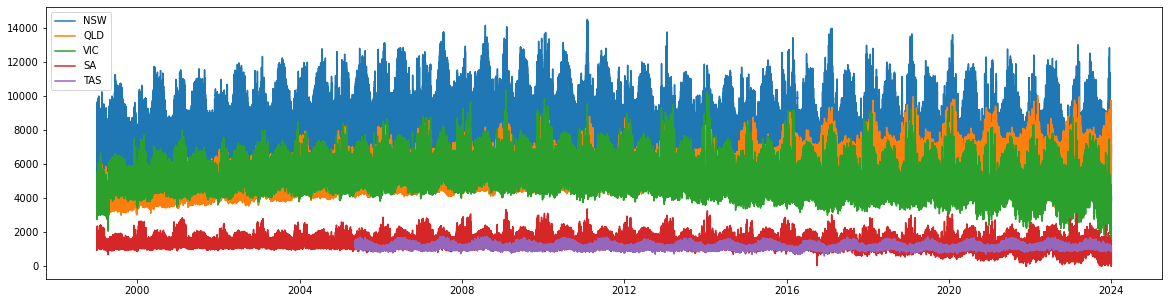

In [5]:
plt.figure(figsize=(20,5))
for state in df_agg_demand.columns:
    plt.plot(df_agg_demand[state], label=state)
plt.legend()
plt.show()

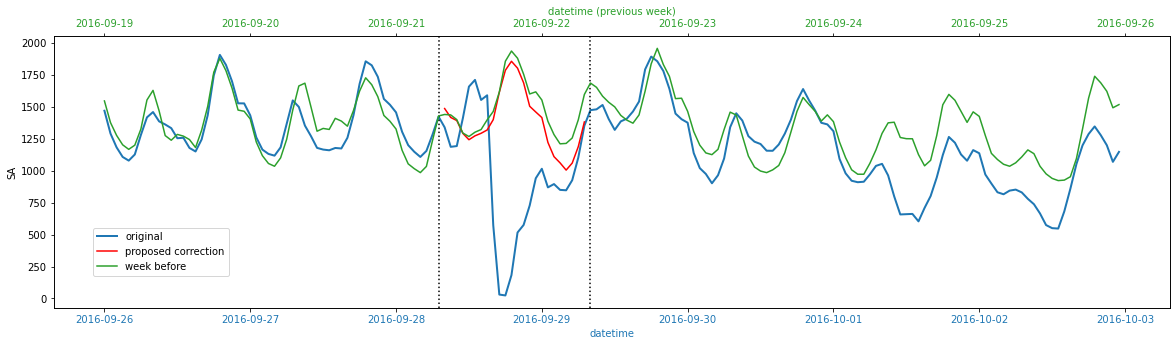

In [6]:
fig, ax1 = plt.subplots(figsize=(20,5)) 
  
color = 'tab:blue'
ax1.set_ylabel('SA') 
ax1.set_xlabel('datetime', color = color) 
ax1.plot(df_agg_demand.loc[(df_agg_demand.index>=pd.to_datetime('2016-09-26 00:00:00')) &
              (df_agg_demand.index<=pd.to_datetime('2016-10-02 23:00:00')), 'SA' ], color = color, lw=2, 
         label='original')

# show cut points, these are not changed
ax1.axvline(x=pd.to_datetime('2016-09-28 07:00:00'), color='k', linestyle=':') # these are not changed
ax1.axvline(x=pd.to_datetime('2016-09-29 08:00:00'), color='k', linestyle=':')



prev_day=df_agg_demand.loc[(df_agg_demand.index>=pd.to_datetime('2016-09-27 08:00:00')) &
              (df_agg_demand.index<=pd.to_datetime('2016-09-28 07:00:00')), 'SA' ].values
next_day=df_agg_demand.loc[(df_agg_demand.index>=pd.to_datetime('2016-09-29 08:00:00')) &
              (df_agg_demand.index<=pd.to_datetime('2016-09-30 07:00:00')), 'SA' ].values

# estimate normal demand by taking the average of the previous and next day
correction1=(prev_day+next_day)/2

# show correction
plt.plot(pd.date_range(start='2016-09-28 08:00:00', end=pd.to_datetime('2016-09-29 07:00:00'), freq='60min'),
         correction1, color='red', label='proposed correction')


ax1.tick_params(axis ='x', labelcolor = color) 

# compare with previous week

ax2 = ax1.twiny() 
  
color = 'tab:green'
ax2.set_xlabel('datetime (previous week)', color = color) 
ax2.plot(df_agg_demand.loc[(df_agg_demand.index>=pd.to_datetime('2016-09-19 00:00:00')) &
              (df_agg_demand.index<=pd.to_datetime('2016-09-25 23:00:00')), 'SA' ], color = color,
        label='week before') 
ax2.tick_params(axis ='x', labelcolor = color) 
  
fig.legend(loc='lower right', ncol=1, bbox_to_anchor=(-0.5,0.2,0.75,1))
plt.show() 

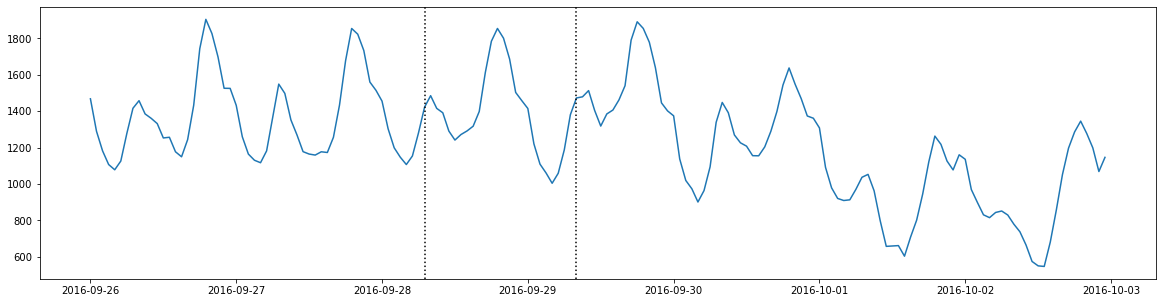

In [7]:
# update df_demand

df_agg_demand.loc[(df_agg_demand.index>=pd.to_datetime('2016-09-28 08:00:00')) &
              (df_agg_demand.index<=pd.to_datetime('2016-09-29 07:00:00')), 'SA']=correction1

# 2016-09-28 was a Wednesday. Show the whole week starting from Monday. 
plt.figure(figsize=(20,5))
plt.plot(df_agg_demand.loc[(df_agg_demand.index>=pd.to_datetime('2016-09-26 00:00:00')) &
              (df_agg_demand.index<=pd.to_datetime('2016-10-02 23:00:00')), 'SA' ])
# show cut points
plt.axvline(x=pd.to_datetime('2016-09-28 07:00:00'), color='k', linestyle=':') # these are not changed
plt.axvline(x=pd.to_datetime('2016-09-29 08:00:00'), color='k', linestyle=':')


plt.show()

In [8]:
# check for nan
df_agg_demand.loc[df_agg_demand.isnull().any(axis=1)]

,NSW,QLD,VIC,SA,TAS
1999-01-01 00:00:00,6620.954165,3885.5,3548.89833,1355.499165,NaN
1999-01-01 01:00:00,5827.261665,3554.416665,3600.685,1215.285,NaN
1999-01-01 02:00:00,5291.680835,3362.0,3231.21167,1053.83833,NaN
1999-01-01 03:00:00,5037.87917,3305.0,2947.05667,989.59917,NaN
1999-01-01 04:00:00,5009.253335,3253.333335,2776.745,954.84583,NaN
...,...,...,...,...,...
2005-05-16 08:00:00,9351.89917,6127.88583,6282.330835,1119.01,NaN
2005-05-16 09:00:00,9448.93417,6024.53667,6299.791665,1180.30583,NaN
2005-05-16 10:00:00,9440.244165,5965.18667,6287.9475,1229.206665,NaN
2005-05-16 11:00:00,9370.465,5964.656665,6245.710835,1199.970835,NaN


In [9]:
# check for nan, excluding TAS where time series started from 2005
df_agg_demand.loc[df_agg_demand[['NSW', 'QLD', 'VIC', 'SA']].isnull().any(axis=1)]

,NSW,QLD,VIC,SA,TAS
1999-05-13 14:00:00,NaN,NaN,NaN,NaN,NaN
2000-05-13 11:00:00,NaN,NaN,NaN,NaN,NaN
2001-04-08 23:00:00,NaN,NaN,NaN,NaN,NaN
2001-04-09 00:00:00,NaN,NaN,NaN,NaN,NaN


In [10]:
df_agg_demand.loc[(df_agg_demand.index.year>=2006) & (df_agg_demand['TAS'].isnull()), 'TAS']

Series([], Freq: 60T, Name: TAS, dtype: object)

In [11]:
# fill nan in the states except TAS by interpolating 
df_agg_demand=df_agg_demand.astype(float)
df_agg_demand[['NSW', 'QLD', 'VIC', 'SA']]=df_agg_demand[['NSW', 'QLD', 'VIC', 'SA']].interpolate()
df_agg_demand.loc[df_agg_demand[['NSW', 'QLD', 'VIC', 'SA']].isnull().any(axis=1)]

,NSW,QLD,VIC,SA,TAS


In [12]:
# check duplicate
df_agg_demand[df_agg_demand.index.duplicated(keep=False)].sort_index()

,NSW,QLD,VIC,SA,TAS


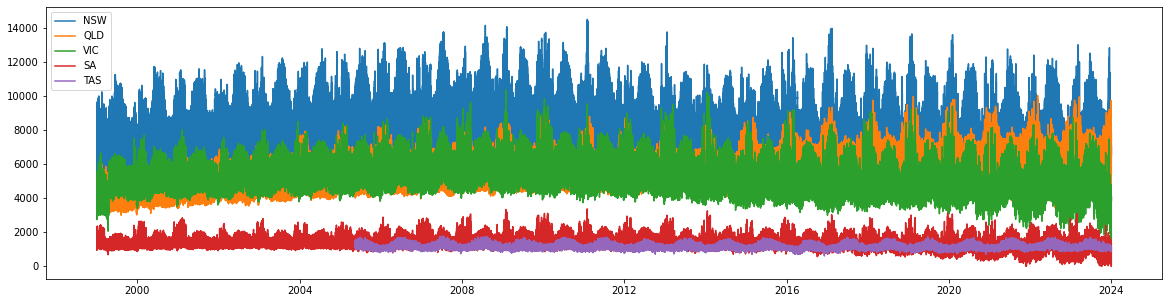

In [13]:
plt.figure(figsize=(20,5))
for state in df_agg_demand.columns:
    plt.plot(df_agg_demand[state], label=state)
plt.legend()
plt.show()

In [14]:
# save full dataframe
df_agg_demand.index.name='AEST'
df_agg_demand.to_csv('AGGdemand_99to23.csv')

In [15]:
df_agg_demand.mean()

NSW    8179.297999
QLD    5772.287156
VIC    5342.803694
SA     1411.851571
TAS    1134.424416
dtype: float64

NSW


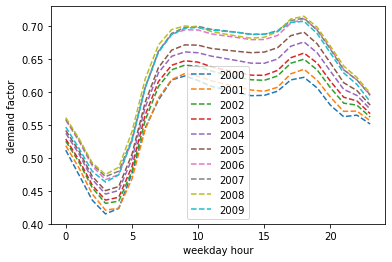

QLD


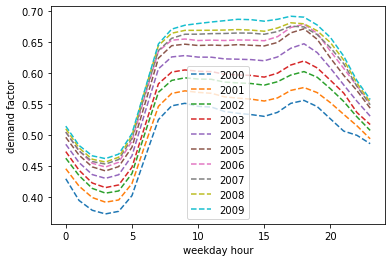

VIC


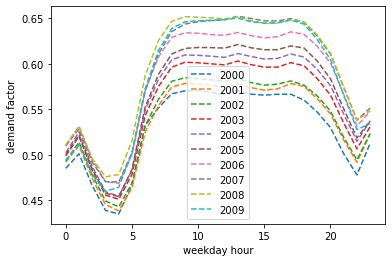

SA


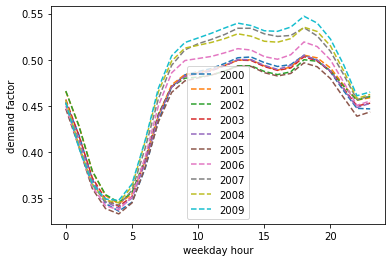

TAS


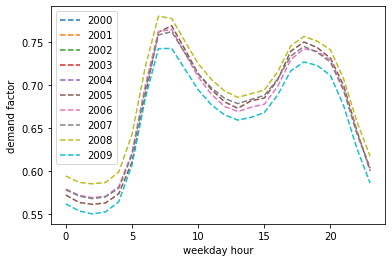

In [16]:
for region in df_agg_demand.columns:
    print(region)
    region_max=df_agg_demand[region].max()
    for year in range(2000, 2010):
        # select only weekdays
        _df=df_agg_demand.loc[(df_agg_demand.index.year==year) & (df_agg_demand.index.dayofweek<=4), region]
        # mean hourly demand
        _df_hourly=_df.groupby(_df.index.hour).mean()/region_max
        if year>=2017:
            plt.plot(_df_hourly.values.T.ravel(), label=year)
        else:
            plt.plot(_df_hourly.values.T.ravel(), label=year, linestyle='--')
    plt.legend()
    plt.xlabel('weekday hour')
    plt.ylabel('demand factor')
    #plt.ylim(0,1)
    plt.show()

NSW


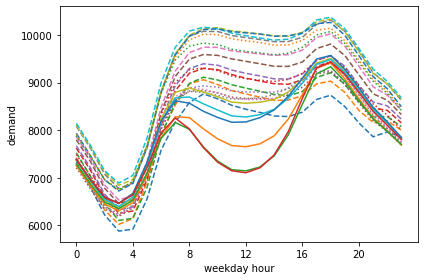

QLD


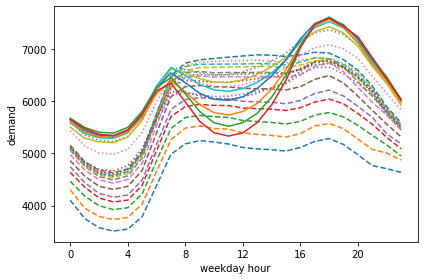

VIC


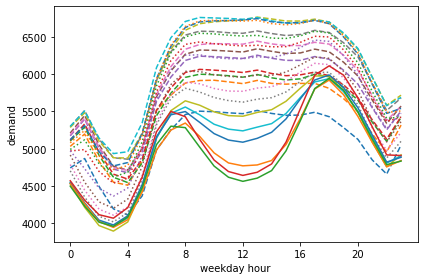

SA


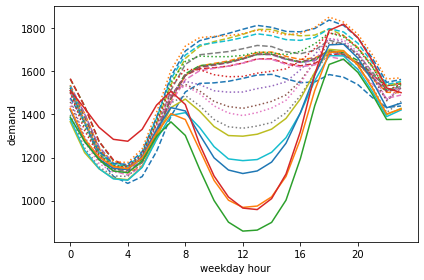

TAS


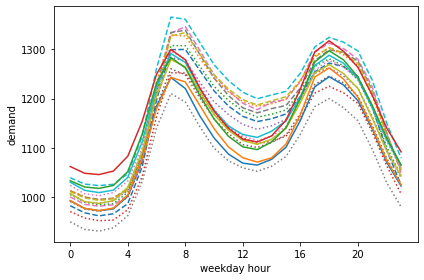

In [17]:
for state in states:
    print(state)
    
    plt.figure()
    
    for year in range(1999, 2010):
        # select only weekdays
        _df=df_agg_demand.loc[(df_agg_demand.index.year==year) & (df_agg_demand.index.dayofweek<=4), state]
        # mean hourly demand
        _df_hourly=_df.groupby(_df.index.hour).mean()
        plt.plot(_df_hourly.values.T.ravel(), label=year, linestyle='--')
        
        
    for year in range(2010, 2023):
        # select only weekdays
        _df=df_agg_demand.loc[(df_agg_demand.index.year==year) & (df_agg_demand.index.dayofweek<=4), state]
        # mean hourly demand
        _df_hourly=_df.groupby(_df.index.hour).mean()
        if year>=2017:
            plt.plot(_df_hourly.values.T.ravel(), label=year)
        else:
            plt.plot(_df_hourly.values.T.ravel(), label=year, linestyle=':')
        
        
    #plt.legend()
    plt.xticks(range(0, 24, 4))
    plt.xlabel('weekday hour')
    plt.ylabel('demand')
    
    plt.tight_layout()
    plt.show()


To avoid the effects of behind-the-meter PV, use demand data prior to 2010 to reflect the underlying end-use demand. 